In [19]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Reading the data
data=pd.read_excel(r"World_development_mesurement.xlsx")
df=data.copy()

# Exploratory Data Analysis & Data Preprocessing

In [21]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,"$23,000,000","$30,000,000"


In [22]:
df.shape

(2704, 25)

In [26]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [29]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [30]:
# Check for duplicates
duplicates = df.duplicated()

# Count number of duplicates
num_duplicates = duplicates.sum()

print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [31]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [32]:
# Creating a function to handle string characters and convert the non numeric into float
def Stringfunction(x):
    if isinstance(x, str):
        x = x.replace('$','')
        x = x.replace(',', '')
        x = x.replace('%', '')
        x = float(x)
    elif isinstance(x, float):
        pass  # no need to do anything if it's already a float
    else:
        try:
            x = x.replace('$','')
            x = x.replace(',', '')
            x = x.replace('%', '')
            x = float(x)
        except:
            pass
    return x

In [33]:
# Dropping Label/Categorical data to convert numerical features into float
df=df.drop('Country', axis=1)

In [34]:
# Applying String Function to the dataframe to remove all special characters from numerical features
df = df.applymap(Stringfunction) # Applymap aplies function to each element of the dataframe
df['Country']=data['Country']
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,Algeria
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,Angola
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,Benin
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,Botswana
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,Burkina Faso


In [35]:
df.info() # Except Country all are others converted to float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [36]:
# Correlation matrix
corr_matrix=df.corr()
corr_matrix

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,0.288982,-0.175750,0.169013,0.727492,-0.169664,-0.195565,-0.227653,-0.463907,0.069324,...,-0.825745,-0.558411,NaN,0.955966,-0.912837,-0.773014,-0.057851,-0.606933,-0.287021,-0.296049
Business Tax Rate,0.288982,1.000000,0.022298,0.013339,0.287221,0.059210,0.005880,0.034727,-0.110941,0.138647,...,-0.312970,-0.233985,NaN,0.218907,-0.258508,-0.106498,0.058711,-0.123177,-0.017257,-0.021214
CO2 Emissions,-0.175750,0.022298,1.000000,-0.055666,NaN,0.988715,0.801876,0.163236,0.254039,0.081485,...,0.141452,0.054400,NaN,-0.198328,0.190808,0.160403,0.721145,0.098051,0.696357,0.650080
Days to Start Business,0.169013,0.013339,-0.055666,1.000000,0.308789,-0.069418,-0.079282,-0.147686,-0.181849,0.148423,...,-0.213764,-0.199868,NaN,0.203978,-0.166224,-0.201973,0.001357,-0.092493,-0.122206,-0.117471
Ease of Business,0.727492,0.287221,NaN,0.308789,1.000000,-0.234867,-0.227305,-0.278061,-0.573508,0.346213,...,-0.706122,-0.582954,NaN,0.741035,-0.631452,-0.646456,0.029175,-0.493255,-0.339292,-0.314160
Energy Usage,-0.169664,0.059210,0.988715,-0.069418,-0.234867,1.000000,0.861041,0.253146,0.278551,0.074673,...,0.132984,0.045198,NaN,-0.184007,0.171528,0.148971,0.677971,0.094218,0.742379,0.703488
GDP,-0.195565,0.005880,0.801876,-0.079282,-0.227305,0.861041,1.000000,0.329416,0.451492,0.030371,...,0.207653,0.129847,NaN,-0.234099,0.161611,0.275494,0.379295,0.185874,0.879849,0.856945
Health Exp % GDP,-0.227653,0.034727,0.163236,-0.147686,-0.278061,0.253146,0.329416,1.000000,0.444986,-0.079755,...,0.219441,0.187336,NaN,-0.292266,0.093604,0.489835,-0.054097,0.205994,0.379051,0.371141
Health Exp/Capita,-0.463907,-0.110941,0.254039,-0.181849,-0.573508,0.278551,0.451492,0.444986,1.000000,-0.213454,...,0.540419,0.460803,NaN,-0.529232,0.362444,0.623775,-0.005934,0.520300,0.556093,0.579977
Hours to do Tax,0.069324,0.138647,0.081485,0.148423,0.346213,0.074673,0.030371,-0.079755,-0.213454,1.000000,...,-0.154317,-0.103461,NaN,0.075677,-0.084376,-0.043624,0.146920,0.010022,-0.058792,-0.040801


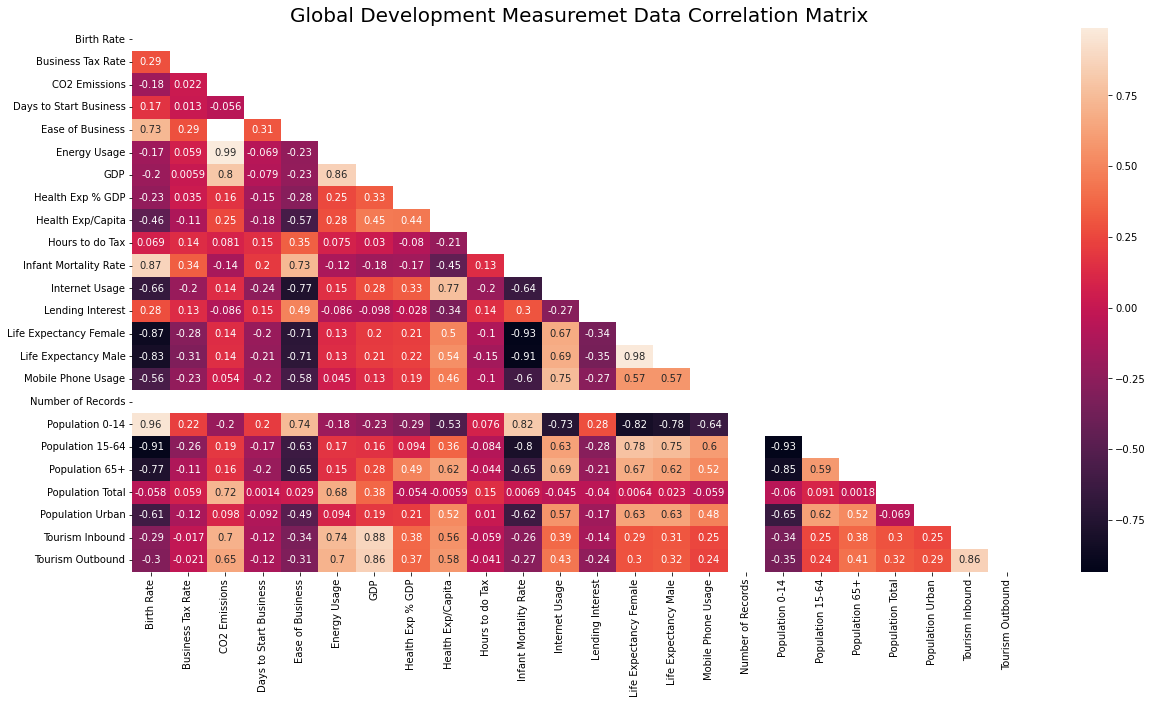

In [37]:
# Representation of correlation matrix using Heatmap
# Generate a mask for the triangle
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Global Development Measuremet Data Correlation Matrix', fontsize=20)
plt.show()


### Key Insights and Patterns from Above Correlation matrix of Heatmap:

##### From the above observations we can see that the data has many underlying relationships between several variables to deal with collinearity problem we should use dimenionality reduction techniques to reduce the dimensions and getting most of the information/variability from the data


### 2.VISUALIZATION

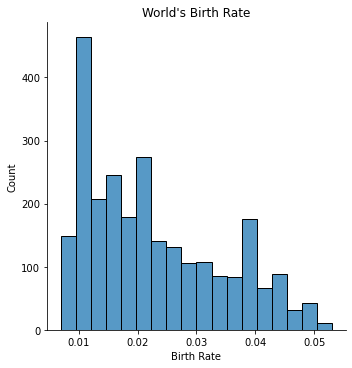

In [38]:
# exploring birth rate
sns.displot(df['Birth Rate'])
plt.title("World's Birth Rate")
plt.show()

It is right skewed distribution,The Birth_Rate data is asymmetrical, The Global Most frequent Birth Rate is 0.01

In [40]:
df['Country'].nunique()

208

In [41]:
df['Country'].value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

In [42]:
print('The total Countries are: ', df['Country'].nunique(),)
print('The country Names are as follows:',"\n \n",  df['Country'].unique())

The total Countries are:  208
The country Names are as follows: 
 
 ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Brunei Darussalam'
 'Cambodia' 'China' 'Georgia' 'Hong Kong SAR, China' 'India' 'Indonesia'
 'Japan' 'Kazakhstan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kyrgyz Republic'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 'N

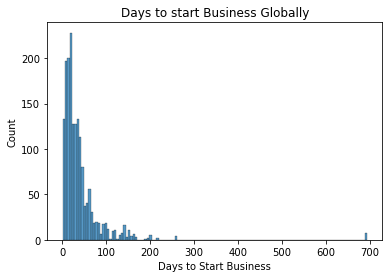

In [43]:
# Plotting the number of Days to start business globally
sns.histplot(df['Days to Start Business'])
plt.title('Days to start Business Globally')
plt.show()

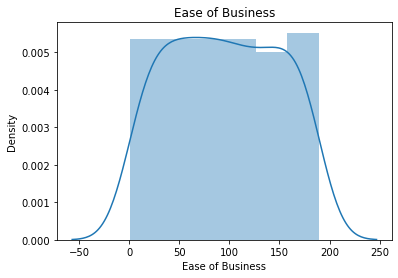

In [44]:
sns.distplot(df['Ease of Business'])
plt.title('Ease of Business')
plt.show()

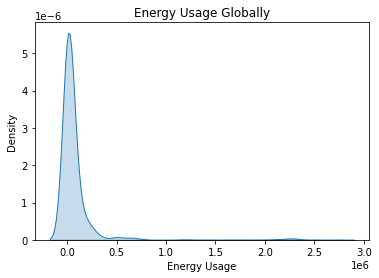

In [45]:
# Plotting Energy Usage Data
sns.kdeplot(df['Energy Usage'],shade=True)
plt.title('Energy Usage Globally')
plt.show()

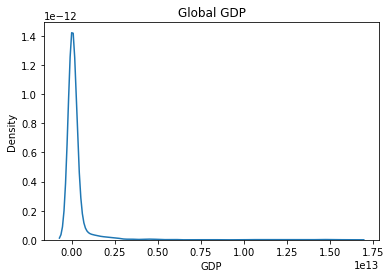

In [46]:
sns.kdeplot(df['GDP'])
plt.title('Global GDP')
plt.show()

mean 0.06416951983298544
median 0.061 

mode 0    0.056
1    0.063
Name: Health Exp % GDP, dtype: float64


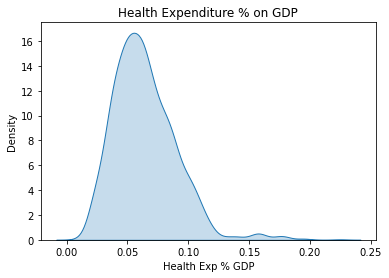

In [47]:
# plotting Health Expenditure % on GDP
print('mean',df['Health Exp % GDP'].mean())
print('median',df['Health Exp % GDP'].median(),'\n')

print('mode',df['Health Exp % GDP'].mode())


sns.kdeplot(x='Health Exp % GDP', data=df, shade=True)
plt.title('Health Expenditure % on GDP')
plt.show()

The Health expenditure on the GDP is slightly right skewed.
Almost 95% of the countries health expenditure is falling in between 0.02 to 0.10 % of their GDP

count    2395.000000
mean      801.397077
std      1473.448036
min         2.000000
25%        50.000000
50%       193.000000
75%       665.000000
max      9908.000000
Name: Health Exp/Capita, dtype: float64


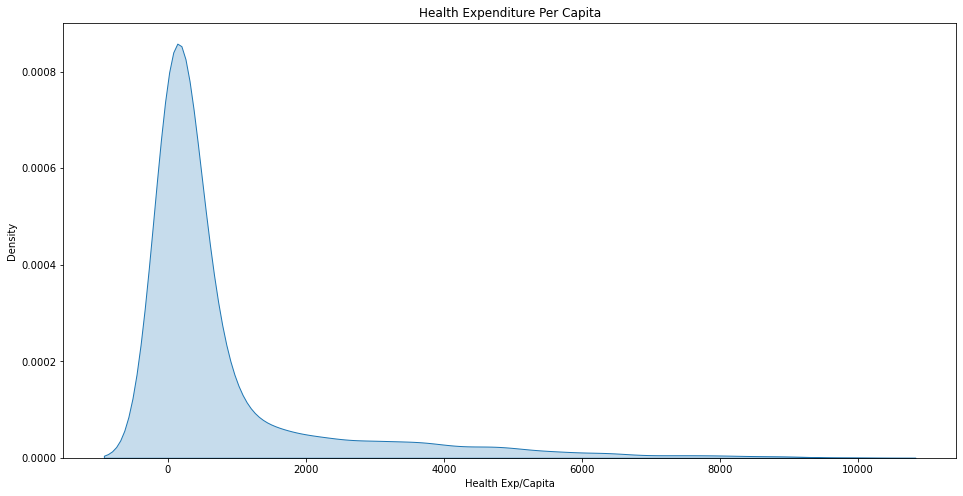

In [48]:
# Health Exp/Capita
print(df['Health Exp/Capita'].describe())
plt.figure(figsize=(16,8))
sns.kdeplot(x='Health Exp/Capita', data=df, shade=True)
plt.title('Health Expenditure Per Capita')
plt.show()

The most of the countries Health expenditure per capita is falling below 2000

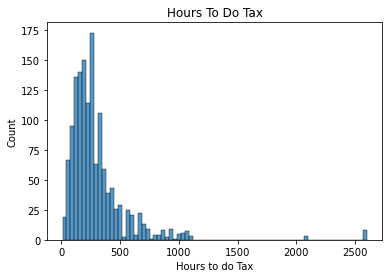

In [49]:
sns.histplot(df['Hours to do Tax'])
plt.title('Hours To Do Tax')
plt.show()

count    2444.000000
mean        0.032813
std         0.029968
min         0.002000
25%         0.009000
50%         0.020000
75%         0.053000
max         0.141000
Name: Infant Mortality Rate, dtype: float64


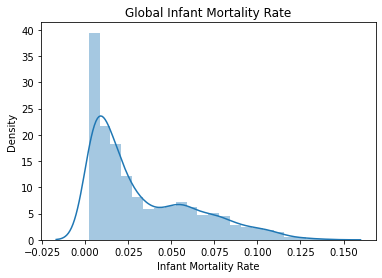

In [50]:
# Plotting Infant Mortality Rate
print(df['Infant Mortality Rate'].describe())
sns.distplot(df['Infant Mortality Rate'])
plt.title('Global Infant Mortality Rate')
plt.show()

Global Infant Mortality Rate is right skewed distribution.
Global Maximum Infant mortality rate is 0.140 %

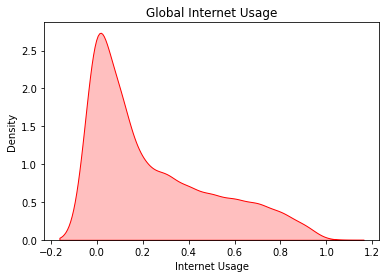

In [51]:
# Global Internet usage
sns.kdeplot(df['Internet Usage'], shade=True, color='red')
plt.title('Global Internet Usage')
plt.show()

We can see that the peakedness of the curve is at 0, hence globally the internet users are very low

count    1880.000000
mean        0.148103
std         0.171829
min         0.005000
25%         0.080000
50%         0.120000
75%         0.173000
max         4.965000
Name: Lending Interest, dtype: float64


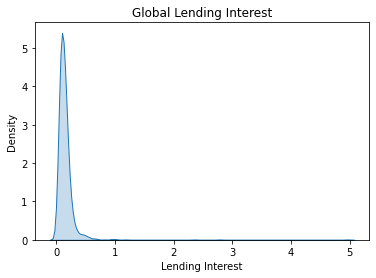

In [52]:
# Plotting Lending Interest 
print(df['Lending Interest'].describe())
sns.kdeplot(df['Lending Interest'], shade=True)
plt.title('Global Lending Interest')
plt.show()

Global lending interest mostly falling below 0.5%, and the highest lending interest rate is 4.9%

count    2568.000000
mean       71.159268
std        10.708262
min        39.000000
25%        64.000000
50%        75.000000
75%        79.000000
max        87.000000
Name: Life Expectancy Female, dtype: float64


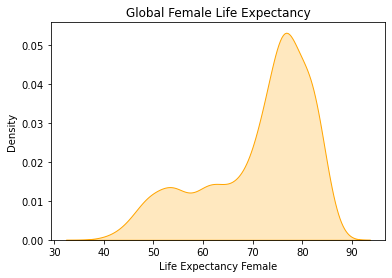

In [53]:
# plotting Life Expectancy Female
print(df['Life Expectancy Female'].describe())
sns.kdeplot(df['Life Expectancy Female'], shade=True, color='orange')
plt.title('Global Female Life Expectancy')
plt.show()

Global Female life expectancy data is negatively skewed distribution.
The maximum female life expectancy is 87 years, mean life expectancy is 71 years, minimum life expectancy is 39 years

count    2568.000000
mean       66.461838
std         9.390217
min        37.000000
25%        61.000000
50%        69.000000
75%        73.250000
max        88.000000
Name: Life Expectancy Male, dtype: float64


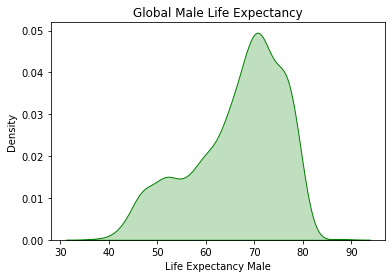

In [55]:
# plotting Life Expectancy Female
print(df['Life Expectancy Male'].describe())
sns.kdeplot(df['Life Expectancy Male'], shade=True, color='Green')
plt.title('Global Male Life Expectancy')
plt.show()

Global Female life expectancy data is negatively skewed distribution.
The maximum female life expectancy is 88 years, mean life expectancy is 66 years, minimum life expectancy is 37 years

count    2537.000000
mean        0.578124
std         0.474647
min         0.000000
25%         0.100000
50%         0.500000
75%         0.900000
max         2.900000
Name: Mobile Phone Usage, dtype: float64


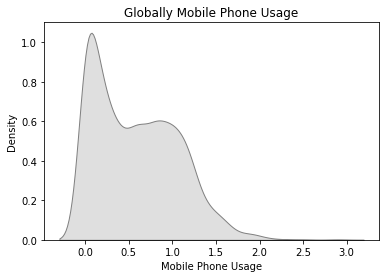

In [56]:
# Plotting Gobal mobile phone usage 
print(df['Mobile Phone Usage'].describe())
sns.kdeplot(df['Mobile Phone Usage'], shade=True, color='Grey')
plt.title('Globally Mobile Phone Usage')
plt.show()

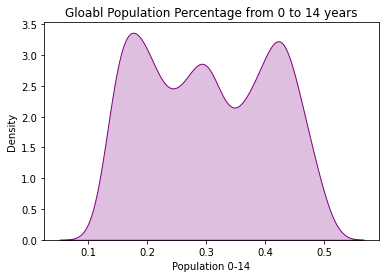

In [57]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population 0-14'], shade=True, color='purple')
plt.title('Gloabl Population Percentage from 0 to 14 years')
plt.show()

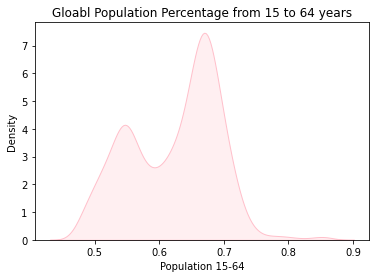

In [58]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population 15-64'], shade=True, color='pink')
plt.title('Gloabl Population Percentage from 15 to 64 years')
plt.show()

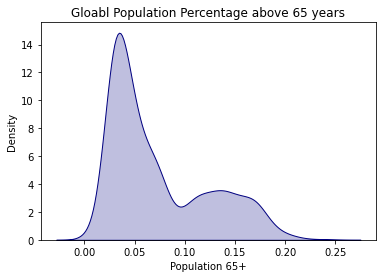

In [59]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population 65+'], shade=True, color='navy')
plt.title('Gloabl Population Percentage above 65 years')
plt.show()

count    2.704000e+03
mean     3.145729e+07
std      1.242894e+08
min      1.887600e+04
25%      8.783360e+05
50%      5.800324e+06
75%      2.014089e+07
max      1.350695e+09
Name: Population Total, dtype: float64


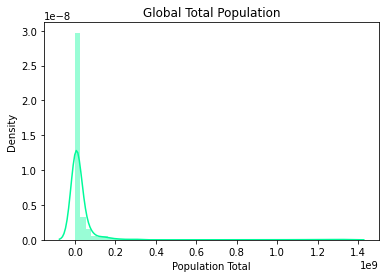

In [60]:
# Global Total Population Representation
print(df['Population Total'].describe())
sns.distplot(df['Population Total'],color='mediumspringgreen')
plt.title('Global Total Population')
plt.show()

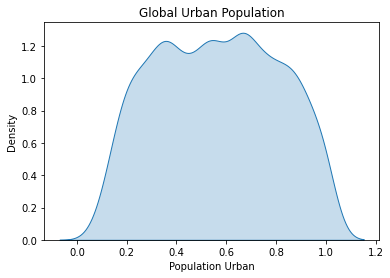

In [61]:
# plotting Global urban population
sns.kdeplot(df['Population Urban'], shade=True)
plt.title('Global Urban Population')
plt.show()

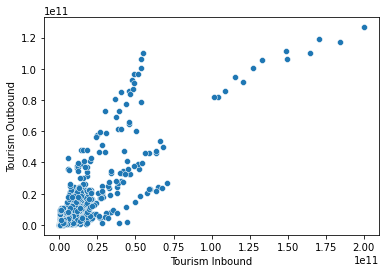

In [62]:
sns.scatterplot(x='Tourism Inbound',y='Tourism Outbound',data=df)
plt.show()

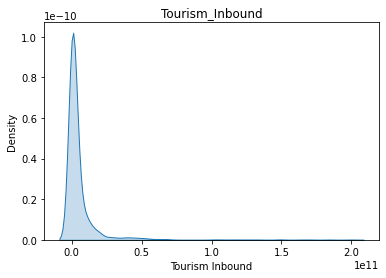

In [63]:
sns.kdeplot(df['Tourism Inbound'], shade=True)
plt.title('Tourism_Inbound')
plt.show()

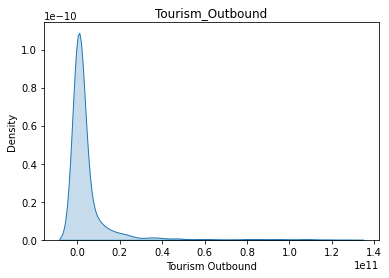

In [64]:
# Plotting tourism outbound data
sns.kdeplot(df['Tourism Outbound'], shade=True)
plt.title('Tourism_Outbound')

plt.show()

In [65]:
# calculating the percentage of null values
null_pertanage=[]
def null_per(x):
    for i in x.columns:
        a=x[i].isnull().sum()/len(x[i]) * 100
        a=round(a,2)
        print(i ,':' ,'\t',a)
        if a>=0:
            null_pertanage.append(i)
null_per(df)    

Birth Rate : 	 4.4
Business Tax Rate : 	 47.37
CO2 Emissions : 	 21.41
Days to Start Business : 	 36.46
Ease of Business : 	 93.16
Energy Usage : 	 33.99
GDP : 	 7.77
Health Exp % GDP : 	 11.43
Health Exp/Capita : 	 11.43
Hours to do Tax : 	 47.63
Infant Mortality Rate : 	 9.62
Internet Usage : 	 6.4
Lending Interest : 	 30.47
Life Expectancy Female : 	 5.03
Life Expectancy Male : 	 5.03
Mobile Phone Usage : 	 6.18
Number of Records : 	 0.0
Population 0-14 : 	 8.14
Population 15-64 : 	 8.14
Population 65+ : 	 8.14
Population Total : 	 0.0
Population Urban : 	 0.96
Tourism Inbound : 	 13.61
Tourism Outbound : 	 17.42
Country : 	 0.0


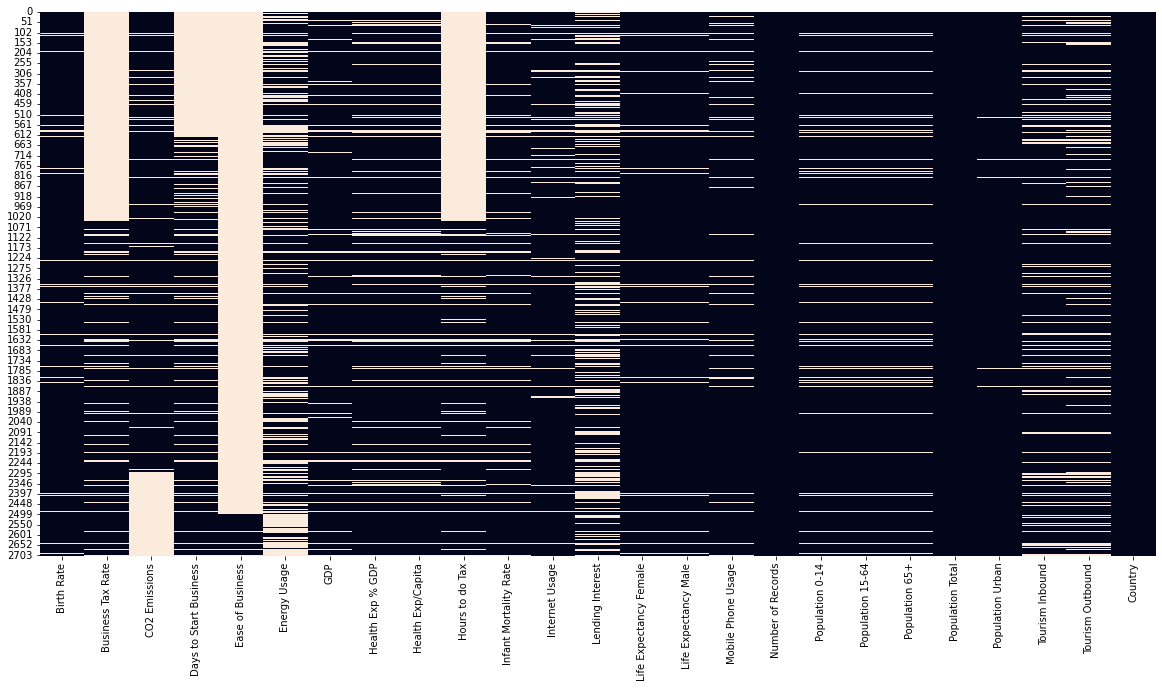

In [66]:
# visualizing null value using heat map 
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()


Ease of doing business has highest missing values, followed by Hours to do tax & Business Tax Rate.

Country, Number of Records & Total Population are the only features which doesnt have any missing values

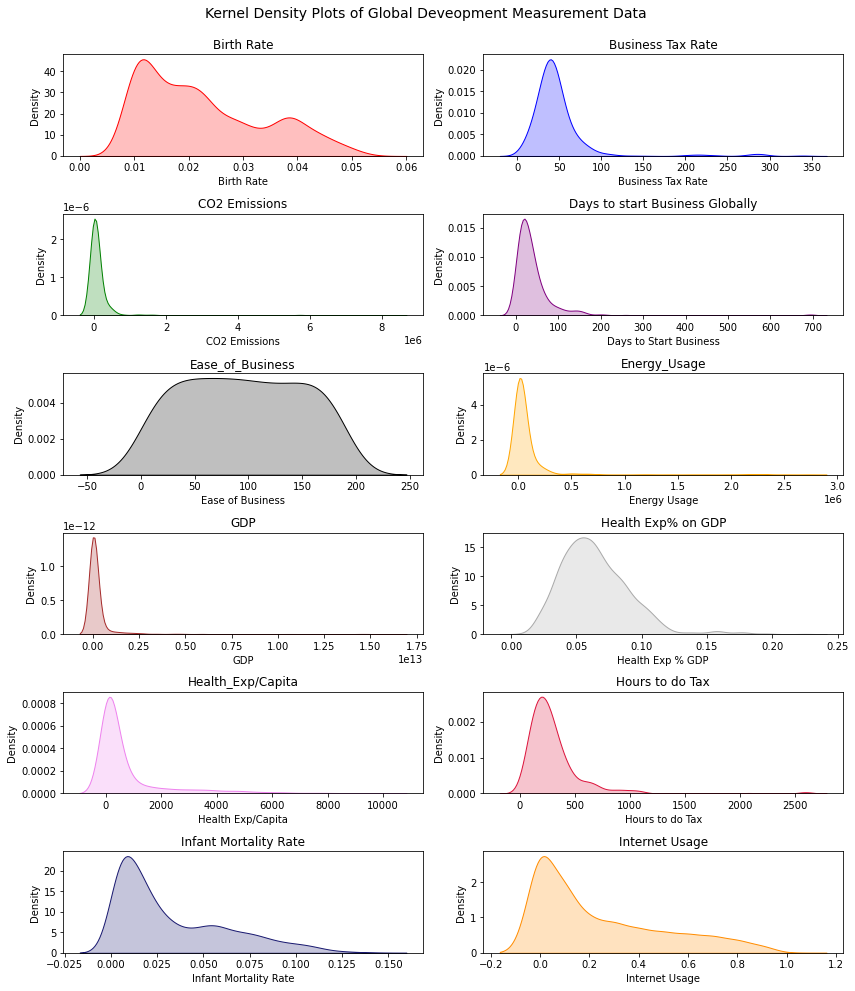

In [71]:
#Creating Subplots to visualize independent variables data

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
#Plot KDE plots

sns.kdeplot(ax=axes[0,0], data=df['Birth Rate'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['Business Tax Rate'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['CO2 Emissions'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['Days to Start Business'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['Ease of Business'], shade=True, color='black')
sns.kdeplot(ax=axes[2,1], data=df['Energy Usage'], shade=True, color='orange')
sns.kdeplot(ax=axes[3,0], data=df['GDP'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,1], data=df['Health Exp % GDP'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[4,0], data=df['Health Exp/Capita'], shade=True, color='violet')
sns.kdeplot(ax=axes[4,1], data=df['Hours to do Tax'], shade=True, color='crimson')
sns.kdeplot(ax=axes[5,0], data=df['Infant Mortality Rate'], shade=True, color='midnightblue')
sns.kdeplot(ax=axes[5,1], data=df['Internet Usage'], shade=True, color='darkorange')

#Set plot titles and labels
axes[0,0].set_title('Birth Rate')
axes[0,1].set_title('Business Tax Rate')
axes[1,0].set_title('CO2 Emissions')
axes[1,1].set_title('Days to start Business Globally')
axes[2,0].set_title('Ease_of_Business')
axes[2,1].set_title('Energy_Usage')
axes[3,0].set_title('GDP')
axes[3,1].set_title('Health Exp% on GDP')
axes[4,0].set_title('Health_Exp/Capita')
axes[4,1].set_title('Hours to do Tax')
axes[5,0].set_title('Infant Mortality Rate')
axes[5,1].set_title('Internet Usage')


fig.suptitle('Kernel Density Plots of Global Deveopment Measurement Data \n', fontsize=14,)
plt.tight_layout()
plt.show()

### Key Insights from Above KDE Plots:
- Features are right skewed distribution 
- Ease of doing business is platykurtic symmetrical distribution


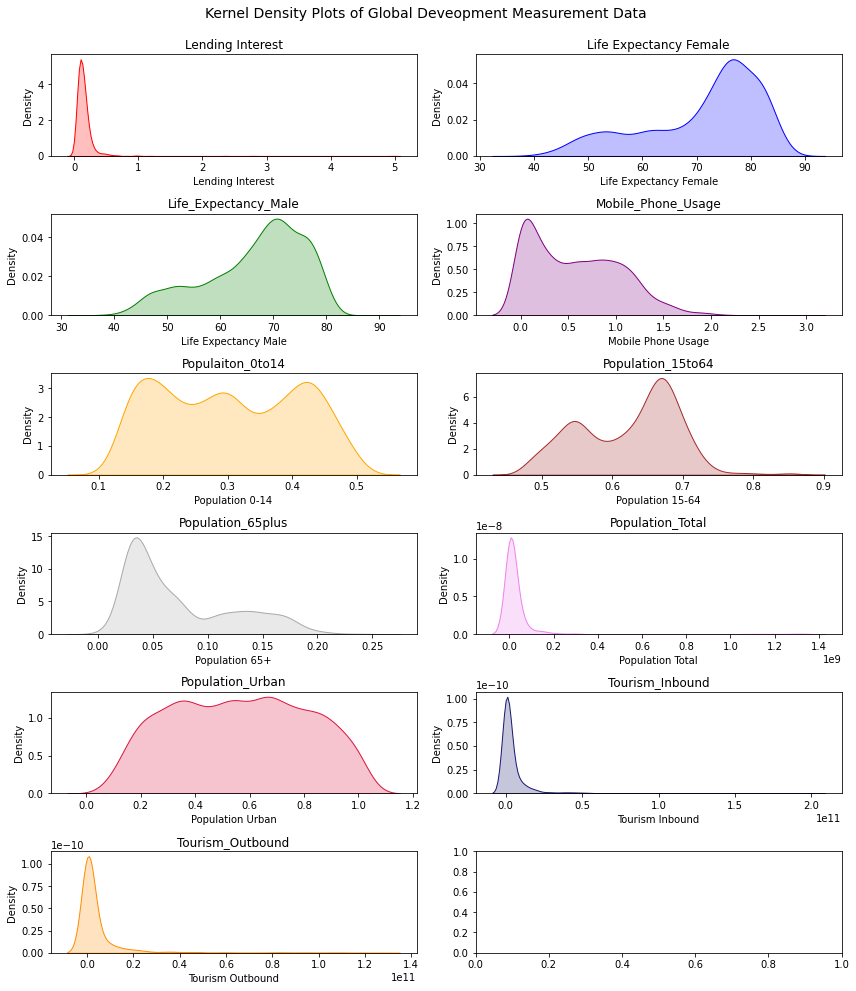

In [72]:
#Creating Subplots to visualize independent variables data

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
#Plot KDE plots

sns.kdeplot(ax=axes[0,0], data=df['Lending Interest'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['Life Expectancy Female'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['Life Expectancy Male'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['Mobile Phone Usage'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['Population 0-14'], shade=True, color='orange')
sns.kdeplot(ax=axes[2,1], data=df['Population 15-64'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,0], data=df['Population 65+'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[3,1], data=df['Population Total'], shade=True, color='violet')
sns.kdeplot(ax=axes[4,0], data=df['Population Urban'], shade=True, color='crimson')
sns.kdeplot(ax=axes[4,1], data=df['Tourism Inbound'], shade=True, color='midnightblue')
sns.kdeplot(ax=axes[5,0], data=df['Tourism Outbound'], shade=True, color='darkorange')

#Set plot titles and labels
axes[0,0].set_title('Lending Interest')
axes[0,1].set_title('Life Expectancy Female')
axes[1,0].set_title('Life_Expectancy_Male')
axes[1,1].set_title('Mobile_Phone_Usage')
axes[2,0].set_title('Populaiton_0to14')
axes[2,1].set_title('Population_15to64')
axes[3,0].set_title('Population_65plus')
axes[3,1].set_title('Population_Total')
axes[4,0].set_title('Population_Urban')
axes[4,1].set_title('Tourism_Inbound')
axes[5,0].set_title('Tourism_Outbound')


fig.suptitle('Kernel Density Plots of Global Deveopment Measurement Data \n', fontsize=14,)
plt.tight_layout()
plt.show()

### Key Insights from Above KDE Plots: 
- Life Expectancy Female and Male & Population 15 to 64 are left skewed distribution
- Lendning Interest Rate, Mobile Phone Usage, Population 65 plus & Tourism Inbound and Outbound are right skewed distribution
- Population Urban is platykurtic symmetrical distribution

In [67]:
# Extracting the top 10 GDP countries by using groupy
highest_gdp = df.groupby('Country')['GDP'].max()
highest_gdp=highest_gdp.sort_values(ascending=False)
highest_gdp.head(10)

Country
United States         1.624460e+13
China                 8.229490e+12
Japan                 5.937767e+12
Germany               3.628110e+12
United Kingdom        2.857083e+12
France                2.831795e+12
Brazil                2.476695e+12
Italy                 2.307312e+12
Russian Federation    2.017471e+12
India                 1.880100e+12
Name: GDP, dtype: float64

In [68]:
# Extracting data countrywise to understand the patterns of the data
US_data=df[df['Country']=='United States']
China_data=df[df['Country']=='China']
Japan_data=df[df['Country']=='Japan']
Germany_data=df[df['Country']=='Germany']
UK_data=df[df['Country']=='United Kingdom']
France_data=df[df['Country']=='France']
Brazil_data=df[df['Country']=='Brazil']
Italy_data=df[df['Country']=='Italy']
Russia_data=df[df['Country']=='Russian Federation']
India_data=df[df['Country']=='India']
US_data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
204,0.014,NaN,5713560.0,NaN,NaN,2273332.0,1.028970e+13,0.136,4790.0,NaN,...,0.4,1.0,0.213,0.663,0.124,282162411.0,0.791,1.209120e+11,9.147300e+10,United States
412,0.014,NaN,5601405.0,NaN,NaN,2230817.0,1.062530e+13,0.142,5138.0,NaN,...,0.4,1.0,0.212,0.665,0.123,284968955.0,0.792,1.091030e+11,8.561000e+10,United States
620,0.014,NaN,5650950.0,NaN,NaN,2255957.0,1.098020e+13,0.151,5578.0,NaN,...,0.5,1.0,0.210,0.667,0.123,287625193.0,0.794,1.044270e+11,8.186000e+10,United States
828,0.014,NaN,5681664.0,6.0,NaN,2261151.0,1.151220e+13,0.156,5993.0,NaN,...,0.5,1.0,0.209,0.669,0.123,290107933.0,0.796,1.015350e+11,8.209100e+10,United States
1036,0.014,NaN,5790765.0,6.0,NaN,2307819.0,1.227700e+13,0.157,6355.0,NaN,...,0.6,1.0,0.207,0.670,0.123,292805298.0,0.798,1.156890e+11,9.476400e+10,United States
1244,0.014,45.8,5826394.0,6.0,NaN,2318861.0,1.309540e+13,0.158,6732.0,325.0,...,0.7,1.0,0.205,0.671,0.123,295516599.0,0.799,1.272370e+11,1.002500e+11,United States
1452,0.014,47.4,5737616.0,6.0,NaN,2296686.0,1.385790e+13,0.159,7110.0,325.0,...,0.8,1.0,0.204,0.672,0.124,298379912.0,0.801,1.333930e+11,1.054760e+11,United States
1660,0.014,46.1,5828697.0,6.0,NaN,2337014.0,1.448030e+13,0.161,7486.0,325.0,...,0.8,1.0,0.202,0.673,0.125,301231207.0,0.803,1.488460e+11,1.111020e+11,United States
1868,0.014,46.4,5656839.0,5.0,NaN,2277034.0,1.472030e+13,0.165,7769.0,187.0,...,0.9,1.0,0.201,0.673,0.127,304093966.0,0.804,1.705240e+11,1.192170e+11,United States
2076,0.014,46.1,5311840.0,5.0,NaN,2164458.0,1.441790e+13,0.177,8009.0,187.0,...,0.9,1.0,0.200,0.672,0.128,306771529.0,0.806,1.495100e+11,1.062850e+11,United States


In [73]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,Algeria
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,Angola
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,Benin
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,Botswana
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,Burkina Faso


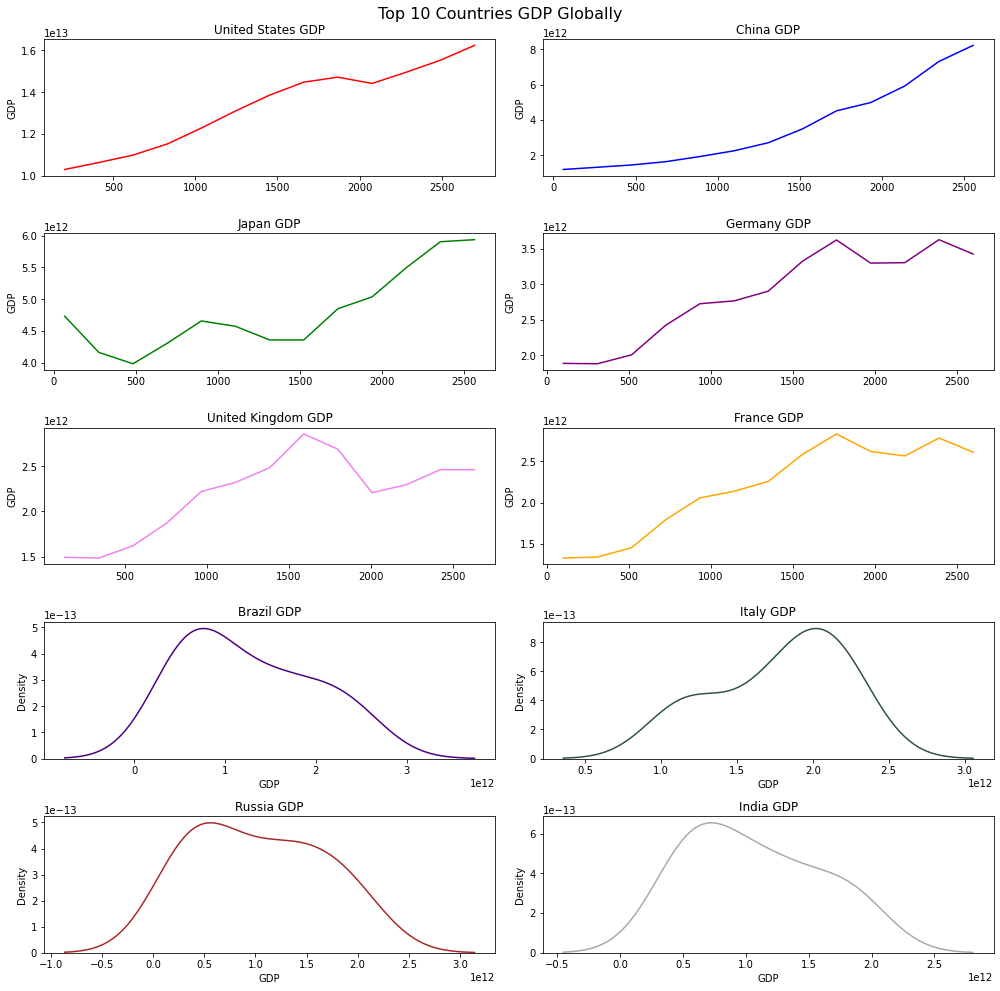

In [74]:
# Plotting Top 10 Coutries GDP 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))

#Plot KDE plots

sns.lineplot(ax=axes[0,0], data=US_data['GDP'],  color='red')
sns.lineplot(ax=axes[0,1], data=China_data['GDP'],  color='blue')
sns.lineplot(ax=axes[1,0], data=Japan_data['GDP'],  color='green')
sns.lineplot(ax=axes[1,1], data=Germany_data['GDP'],  color='purple')
sns.lineplot(ax=axes[2,0], data=UK_data['GDP'],  color='violet')
sns.lineplot(ax=axes[2,1], data=France_data['GDP'],  color='orange')
sns.kdeplot(ax=axes[3,0], data=Brazil_data['GDP'], color='indigo')
sns.kdeplot(ax=axes[3,1], data=Italy_data['GDP'], color='darkslategrey')
sns.kdeplot(ax=axes[4,0], data=Russia_data['GDP'], color='brown')
sns.kdeplot(ax=axes[4,1], data=India_data['GDP'], color='darkgrey')

#Set plot titles and labels
axes[0,0].set_title('United States GDP')
axes[0,1].set_title('China GDP')
axes[1,0].set_title('Japan GDP')
axes[1,1].set_title('Germany GDP')
axes[2,0].set_title('United Kingdom GDP')
axes[2,1].set_title('France GDP')
axes[3,0].set_title('Brazil GDP')
axes[3,1].set_title('Italy GDP')
axes[4,0].set_title('Russia GDP')
axes[4,1].set_title('India GDP')

fig.suptitle('Top 10 Countries GDP Globally', fontsize=16)
plt.tight_layout()
plt.show()

## Key Insights from the above lineplots:
1. We can observe that the countries United States, China, Japan , Germany, United kingdom & France are having clear increasing trend
2. Brazil, Italy, Russia and India are having decreasing Trend over a period of time


## Handling Missing Values

In [79]:
# Creating a function to fill missing values with median
def missing(x):
    md=x.median()
    x=x.fillna(md)
    return x

In [76]:
# Null Values Percentage
null_per(df)

Birth Rate : 	 4.4
Business Tax Rate : 	 47.37
CO2 Emissions : 	 21.41
Days to Start Business : 	 36.46
Ease of Business : 	 93.16
Energy Usage : 	 33.99
GDP : 	 7.77
Health Exp % GDP : 	 11.43
Health Exp/Capita : 	 11.43
Hours to do Tax : 	 47.63
Infant Mortality Rate : 	 9.62
Internet Usage : 	 6.4
Lending Interest : 	 30.47
Life Expectancy Female : 	 5.03
Life Expectancy Male : 	 5.03
Mobile Phone Usage : 	 6.18
Number of Records : 	 0.0
Population 0-14 : 	 8.14
Population 15-64 : 	 8.14
Population 65+ : 	 8.14
Population Total : 	 0.0
Population Urban : 	 0.96
Tourism Inbound : 	 13.61
Tourism Outbound : 	 17.42
Country : 	 0.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

Imputing missing values

In [80]:
# Missing values imptatation with median, 4.40% missing data
df['Birth Rate']=missing(df['Birth Rate'])

    
# Imputing Infant Mortality Rate, missing data: 9.61%
df['Infant Mortality Rate']=missing(df['Infant Mortality Rate'])
                         
# Imputing  Internet Usage, missing data: 6.39%                        
df['Internet Usage']=missing(df['Internet Usage'])

# Imputing Life_Expectancy_Male, missing data is 5.029%
df['Life Expectancy Male']=missing(df['Life Expectancy Male'])
                         
# Imputing Life_Expectancy_Female missing data, missing data is 5.029%
df['Life Expectancy Female']=missing(df['Life Expectancy Female'])       

# Imputing Mobile phone usage missing data, missing data is 6.17%
df['Mobile Phone Usage']=missing(df['Mobile Phone Usage'])   

In [81]:
df.isnull().sum()

Birth Rate                   0
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate        0
Internet Usage               0
Lending Interest           824
Life Expectancy Female       0
Life Expectancy Male         0
Mobile Phone Usage           0
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
Country                      0
dtype: int64

In [83]:
# Dropping Ease of Business which has 93% missing values
df=df.drop('Ease of Business', axis=1)

In [84]:
df=df.drop('Number of Records', axis=True)

In [85]:
# Imputing missing values with Linear Interpolatation forward and  backward linear interpolation
df = df.interpolate(method='linear', limit_direction='forward', axis=0)
df = df.interpolate(method='linear', limit_direction='backward', axis=0)

In [86]:
df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
Country                   0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   Business Tax Rate       2704 non-null   float64
 2   CO2 Emissions           2704 non-null   float64
 3   Days to Start Business  2704 non-null   float64
 4   Energy Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health Exp % GDP        2704 non-null   float64
 7   Health Exp/Capita       2704 non-null   float64
 8   Hours to do Tax         2704 non-null   float64
 9   Infant Mortality Rate   2704 non-null   float64
 10  Internet Usage          2704 non-null   float64
 11  Lending Interest        2704 non-null   float64
 12  Life Expectancy Female  2704 non-null   float64
 13  Life Expectancy Male    2704 non-null   float64
 14  Mobile Phone Usage      2704 non-null   

In [88]:
df.head(100)

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0.020,76.9,87931.0,25.0,26998.000000,5.479006e+10,0.0350,60.0,451.0,0.034,...,67.0,0.0,0.342,0.619,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.050,76.9,9542.0,25.0,7499.000000,9.129595e+09,0.0340,22.0,451.0,0.128,...,44.0,0.0,0.476,0.499,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola
2,0.043,76.9,1617.0,25.0,1983.000000,2.359122e+09,0.0430,15.0,451.0,0.090,...,53.0,0.0,0.454,0.517,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin
3,0.027,76.9,4276.0,25.0,1836.000000,5.788312e+09,0.0470,152.0,451.0,0.054,...,49.0,0.1,0.383,0.587,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.046,76.9,1041.0,25.0,3327.333333,2.610959e+09,0.0510,12.0,451.0,0.096,...,49.0,0.0,0.468,0.505,0.0280,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.013,76.9,6850.0,25.0,2137.000000,9.314938e+09,0.0580,744.0,451.0,0.006,...,76.0,0.2,0.224,0.674,0.1020,943287.0,0.686,2.137000e+09,5.430000e+08,Cyprus
96,0.009,76.9,124649.0,25.0,40993.000000,5.880724e+10,0.0630,361.0,451.0,0.006,...,72.0,0.4,0.165,0.697,0.1380,10255063.0,0.740,2.973000e+09,1.276000e+09,Czech Republic
97,0.013,76.9,47260.0,25.0,18634.000000,1.600825e+11,0.0870,2613.0,451.0,0.005,...,74.0,0.6,0.185,0.667,0.1490,5339616.0,0.851,3.671000e+09,4.669000e+09,Denmark
98,0.010,76.9,15181.0,25.0,4715.000000,5.675698e+09,0.0530,213.0,451.0,0.009,...,65.0,0.4,0.180,0.669,0.1520,1396985.0,0.694,6.570000e+08,2.530000e+08,Estonia


In [89]:
# Removed Country column
df1=df.iloc[:,:-1]
df1

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,76.90,87931.0,25.0,2.699800e+04,5.479006e+10,0.0350,60.0,451.0,0.034,...,71.0,67.0,0.0,0.3420,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08
1,0.050,76.90,9542.0,25.0,7.499000e+03,9.129595e+09,0.0340,22.0,451.0,0.128,...,47.0,44.0,0.0,0.4760,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08
2,0.043,76.90,1617.0,25.0,1.983000e+03,2.359122e+09,0.0430,15.0,451.0,0.090,...,57.0,53.0,0.0,0.4540,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07
3,0.027,76.90,4276.0,25.0,1.836000e+03,5.788312e+09,0.0470,152.0,451.0,0.054,...,52.0,49.0,0.1,0.3830,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08
4,0.046,76.90,1041.0,25.0,3.327333e+03,2.610959e+09,0.0510,12.0,451.0,0.096,...,52.0,49.0,0.0,0.4680,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,37.75,201747.0,23.0,1.993837e+06,8.134018e+12,0.1165,4933.5,192.5,0.020,...,75.0,69.0,0.5,0.2015,0.686,0.112,32427.0,0.911,1.334210e+11,8.440133e+10
2700,0.013,46.40,201747.0,5.0,2.132446e+06,1.624460e+13,0.1790,8895.0,175.0,0.006,...,81.0,76.0,1.0,0.1960,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.90,201747.0,7.0,2.132446e+06,5.000435e+10,0.0890,1308.0,310.0,0.010,...,80.0,74.0,1.5,0.2200,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.90,201747.0,144.0,2.132446e+06,3.812862e+11,0.0460,593.0,792.0,0.013,...,78.0,72.0,1.0,0.2880,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09


## Assessing the clustering tendency of the data set by using Hopkins Statistic


In [90]:
# Defining Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [92]:
hopkins(df1)

0.9788653878039285

### Insights from Hopkins Statistic:
- The given dataset is most suitable for creating a clustering model, since the hopkins statistic value is 0.978 which is very very near to 1

## Scaling the Data

In [98]:
df1_normal=(df1-df1.mean())/df1.std()

In [99]:
df1_normal

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.233821,0.522025,-0.118176,-0.228729,-0.226087,-0.200426,-1.152594,-0.523635,0.444292,0.084171,...,-0.033665,0.044777,-1.245934,0.416610,-0.098764,-0.748497,0.002109,0.148884,-0.362455,-0.356762
1,2.468879,0.522025,-0.260721,-0.228729,-0.303405,-0.239231,-1.191335,-0.550117,0.444292,3.354954,...,-2.326123,-2.464020,-1.245934,1.684995,-1.862691,-1.029492,-0.141061,-0.972226,-0.367342,-0.360447
2,1.838249,0.522025,-0.275132,-0.228729,-0.325277,-0.244985,-0.842667,-0.554995,0.444292,2.032723,...,-1.370932,-1.482317,-1.245934,1.476753,-1.598102,-0.949208,-0.197184,-0.731697,-0.364252,-0.367973
3,0.396809,0.522025,-0.270296,-0.228729,-0.325860,-0.242071,-0.687703,-0.459521,0.444292,0.780082,...,-1.848527,-1.918629,-1.028607,0.804698,-0.569145,-0.949208,-0.238974,-0.124259,-0.353471,-0.355508
4,2.108519,0.522025,-0.276179,-0.228729,-0.319947,-0.244771,-0.532739,-0.557086,0.444292,2.241496,...,-1.848527,-1.918629,-1.245934,1.609270,-1.774494,-0.969279,-0.159703,-1.567434,-0.368133,-0.369541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.233821,-0.654764,0.088790,-0.271367,7.572846,6.665796,2.004796,2.872651,-0.752756,-0.402967,...,0.348411,0.262933,-0.159298,-0.913300,0.886095,0.716691,-0.252836,1.420835,9.219198,6.245086
2700,-0.864451,-0.394758,0.088790,-0.655108,8.122459,13.558665,4.426108,5.633374,-0.833794,-0.890105,...,0.921526,1.026480,0.927338,-0.965361,0.606806,1.198396,2.272249,1.013158,14.010851,9.551301
2701,-0.684271,-0.530021,0.088790,-0.612470,8.122459,-0.204493,0.939419,0.346082,-0.208643,-0.750923,...,0.826007,0.808324,2.013974,-0.738187,0.195224,1.278681,-0.225780,1.571675,-0.210090,-0.291299
2702,-0.233821,0.071148,0.088790,2.308223,8.122459,0.077050,-0.726444,-0.152193,2.023376,-0.646536,...,0.634969,0.590167,0.927338,-0.094530,0.386316,-0.327005,-0.012089,1.331146,-0.304815,-0.120859


## PCA for Dimensionality Reduction:

In [102]:
from sklearn.decomposition import PCA
# Instantiate PCA object with maximum number of components
pca = PCA()

# Fit the PCA model on the standardized data
pca_values=pca.fit_transform(df1_normal)
pca_values

array([[-1.29787509e+00, -3.22773811e-01,  1.27631199e+00, ...,
         3.52877716e-01,  7.46190077e-02, -1.04005586e-04],
       [-6.48832453e+00,  1.80291763e+00, -1.13127885e+00, ...,
        -4.05396660e-02, -1.97237133e-01, -2.07179204e-04],
       [-4.74532438e+00,  1.05291085e+00, -5.80344690e-01, ...,
        -6.85918631e-02, -1.58149100e-01, -6.11734836e-05],
       ...,
       [ 3.84042832e+00,  2.03718758e+00,  5.84650351e-01, ...,
         4.38450237e-01,  1.36607834e-01, -5.64442948e-03],
       [ 1.99378809e+00,  2.63129262e+00,  2.94725071e+00, ...,
         1.75391344e-01,  5.48038588e-02,  1.58818175e-03],
       [ 2.81653379e+00,  2.32545922e+00,  3.17676973e+00, ...,
         4.51935499e-01,  1.58219079e-01, -6.25434973e-03]])

In [117]:
from sklearn.decomposition import PCA

# Instantiate PCA object with maximum number of components
pca = PCA()
pca_values=pca.fit_transform(df1_normal)
pca_values


array([[-1.29787509e+00, -3.22773811e-01,  1.27631199e+00, ...,
         3.52877716e-01,  7.46190077e-02, -1.04005586e-04],
       [-6.48832453e+00,  1.80291763e+00, -1.13127885e+00, ...,
        -4.05396660e-02, -1.97237133e-01, -2.07179204e-04],
       [-4.74532438e+00,  1.05291085e+00, -5.80344690e-01, ...,
        -6.85918631e-02, -1.58149100e-01, -6.11734836e-05],
       ...,
       [ 3.84042832e+00,  2.03718758e+00,  5.84650351e-01, ...,
         4.38450237e-01,  1.36607834e-01, -5.64442948e-03],
       [ 1.99378809e+00,  2.63129262e+00,  2.94725071e+00, ...,
         1.75391344e-01,  5.48038588e-02,  1.58818175e-03],
       [ 2.81653379e+00,  2.32545922e+00,  3.17676973e+00, ...,
         4.51935499e-01,  1.58219079e-01, -6.25434973e-03]])

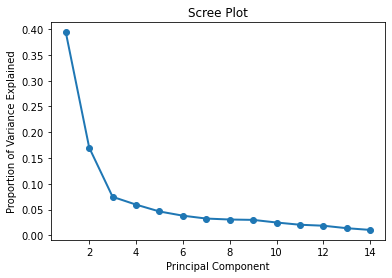

In [119]:
explained_variance_ratio = pca.explained_variance_ratio_
# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

In [118]:
pca = PCA(n_components = 14)
pca_values_14 = pca.fit_transform(df1_normal)
pca_values_14

array([[-1.29787509, -0.32277381,  1.27631199, ..., -0.40380813,
        -0.13614566,  0.18056676],
       [-6.48832453,  1.80291763, -1.13127885, ..., -0.29074639,
        -0.22929412, -0.20636493],
       [-4.74532438,  1.05291085, -0.58034469, ..., -0.04105707,
        -0.16629828, -0.23601137],
       ...,
       [ 3.84042832,  2.03718758,  0.58465035, ...,  0.70602818,
        -2.91145097,  0.08835733],
       [ 1.99378809,  2.63129262,  2.94725071, ...,  1.29224046,
        -2.95689514,  1.17881996],
       [ 2.81653379,  2.32545922,  3.17676973, ...,  0.3912962 ,
        -3.36130242,  0.16127112]])

In [120]:
var=pca.explained_variance_ratio_
var

array([0.39392086, 0.17016934, 0.07476743, 0.05967447, 0.04637443,
       0.03823245, 0.03264613, 0.03078708, 0.03007464, 0.02498048,
       0.02065378, 0.0187643 , 0.0139546 , 0.01061562])

In [121]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.39, 56.41, 63.89, 69.86, 74.5 , 78.32, 81.58, 84.66, 87.67,
       90.17, 92.24, 94.12, 95.52, 96.58])

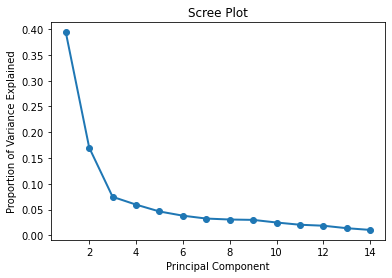

In [122]:
explained_variance_ratio = pca.explained_variance_ratio_
# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

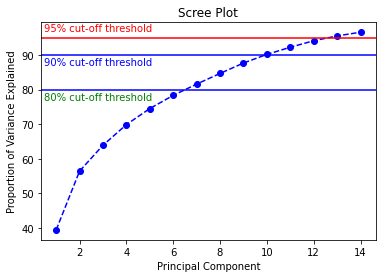

In [123]:
explained_variance_ratio = pca.explained_variance_ratio_
# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), var1, marker='o' ,linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 97, '95% cut-off threshold', color = 'red', fontsize=10)
plt.axhline(y=90, color='b', linestyle='-')
plt.text(0.5, 87, '90% cut-off threshold', color = 'blue', fontsize=10)
plt.axhline(y=80, color='b', linestyle='-')
plt.text(0.5, 77, '80% cut-off threshold', color = 'Green', fontsize=10)
plt.title('Scree Plot')
plt.show()

We can observe that the 78 % of the variance captured with 6 Principal Components.

90 % of the variance captured with 10 PCA's.

95% of the variance captured with 13 PCA's

In [126]:
PCA_data=pd.DataFrame(pca_values_14[:,0:6], columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
PCA_data.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.297875,-0.322774,1.276312,0.245787,-0.675056,-0.661699
1,-6.488325,1.802918,-1.131279,1.437881,1.460693,4.104450
2,-4.745324,1.052911,-0.580345,0.867532,0.460770,1.786984
3,-3.136657,0.421438,0.026670,0.282575,-0.361834,-0.274033
4,-5.049017,1.310954,-0.884181,-0.096699,-0.570433,-0.384301


## Using Factor Analysis for Dimensionality Reduction &  for Building Model

In [127]:
!pip install factor-analyzer

In [130]:
from factor_analyzer import FactorAnalyzer
n_factors=10
fa = FactorAnalyzer(n_factors=n_factors)
factors=fa.fit(df1_normal)
factors

FactorAnalyzer(n_factors=10, rotation_kwargs={})

In [131]:
ev, v = fa.get_eigenvalues()

In [132]:
ev

array([8.66625885e+00, 3.74372544e+00, 1.64488353e+00, 1.31283843e+00,
       1.02023753e+00, 8.41113911e-01, 7.18214801e-01, 6.77315862e-01,
       6.61642107e-01, 5.49570526e-01, 4.54383224e-01, 4.12814526e-01,
       3.07001290e-01, 2.33543617e-01, 1.97081380e-01, 1.70075711e-01,
       1.29916756e-01, 9.89581429e-02, 8.96225760e-02, 5.50390802e-02,
       1.57485277e-02, 1.41950099e-05])

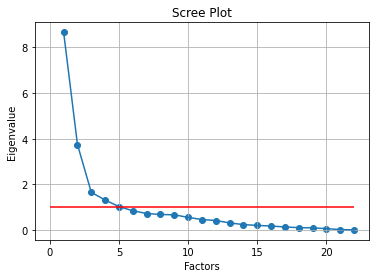

In [134]:

# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df1_normal.shape[1]+1),ev)
plt.plot(range(1,df1_normal.shape[1]+1),ev)
plt.hlines(1, 0, df1_normal.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [135]:
fa.loadings_

array([[-9.57940575e-01,  3.91925042e-02, -2.39064425e-02,
         7.67970841e-02,  9.85784204e-02,  4.30839412e-02,
        -1.88441591e-01, -5.33916430e-02,  2.14846088e-01,
        -2.64360310e-02],
       [-1.12263256e-01, -6.68337359e-03,  5.08373778e-03,
        -6.73902343e-02,  6.93111299e-03,  5.95656661e-01,
        -1.18533207e-02,  6.27384097e-03, -7.29467217e-03,
        -2.42329740e-01],
       [ 4.86581243e-02,  9.60939594e-02,  8.11909584e-01,
         1.15174656e-02,  2.61440069e-02,  4.48130995e-03,
        -5.65490423e-02,  1.02036425e-01, -1.90286058e-02,
        -3.97505153e-02],
       [-3.03989017e-02,  1.73728173e-02, -3.51867529e-03,
        -2.21296104e-02,  2.64545330e-02, -5.62065431e-02,
         2.90435935e-03, -5.85623253e-02,  1.62417392e-02,
         4.23199159e-01],
       [ 4.71593514e-02,  4.56062262e-01,  5.03983266e-01,
         5.53894095e-02, -9.79948476e-02, -4.39261386e-02,
        -1.02861653e-01,  1.20378018e-01, -4.32722537e-02,
         4.

In [136]:
fa.get_communalities()

array([1.02244805, 0.43102667, 0.68718649, 0.18838633, 0.507666  ,
       0.93143361, 0.38823096, 0.84667024, 0.39328619, 1.0028702 ,
       0.40306006, 0.09323695, 1.11427125, 1.00211208, 1.13815174,
       0.72981838, 1.11666543, 0.65001829, 0.73868898, 0.54988499,
       0.9461287 , 0.88807822])

In [139]:
# Perform Factor Analysis
fa = FactorAnalyzer(list(ev >= 0.95).count(True), rotation='varimax')
fa_data=fa.fit(df1_normal)
loads = fa.loadings_
print(loads)

[[-9.34859312e-01 -9.04135737e-02 -1.37775763e-01 -6.36169159e-02
   1.34810664e-01]
 [-1.78893124e-01 -9.48776402e-03  3.62699895e-02 -4.77002450e-01
  -1.59378538e-02]
 [ 8.81596467e-02  8.59361802e-01  5.00056575e-02 -1.22481623e-02
  -8.92833350e-02]
 [-1.22264417e-01 -7.67700576e-04 -1.42954798e-01 -9.07053139e-02
   1.34898303e-02]
 [ 5.40487428e-02  8.66521374e-01  1.79580838e-01  1.45778897e-02
   4.17385241e-02]
 [ 6.49878796e-02  7.52632857e-01  5.18689842e-01 -5.03986852e-04
   2.46446991e-01]
 [ 7.54740332e-02  7.41499724e-02  5.55034222e-01  1.45874160e-02
  -2.23079665e-02]
 [ 3.44996433e-01  1.47201176e-01  6.90611300e-01  2.72766702e-01
  -1.22483630e-02]
 [-2.22010792e-02  6.02706371e-02 -1.11441188e-01 -4.65921002e-01
  -2.69946291e-02]
 [-9.04426803e-01 -4.30933285e-02 -9.31369098e-02 -2.00875859e-01
  -1.27025917e-01]
 [ 5.57657757e-01  3.29986371e-02  4.43353937e-01  4.99672483e-01
  -1.79643454e-01]
 [-2.87863908e-01 -8.21927176e-02 -3.91226665e-02 -2.22748686e-01

In [143]:
# Reset index of df1_normal and create a new DataFrame for the loadings
df1_normal = df1_normal.reset_index(drop=True)
loads = pd.DataFrame(loads, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index=df1_normal.columns)
print(loads)

                        Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
Birth Rate             -0.934859 -0.090414 -0.137776 -0.063617  0.134811
Business Tax Rate      -0.178893 -0.009488  0.036270 -0.477002 -0.015938
CO2 Emissions           0.088160  0.859362  0.050006 -0.012248 -0.089283
Days to Start Business -0.122264 -0.000768 -0.142955 -0.090705  0.013490
Energy Usage            0.054049  0.866521  0.179581  0.014578  0.041739
GDP                     0.064988  0.752633  0.518690 -0.000504  0.246447
Health Exp % GDP        0.075474  0.074150  0.555034  0.014587 -0.022308
Health Exp/Capita       0.344996  0.147201  0.690611  0.272767 -0.012248
Hours to do Tax        -0.022201  0.060271 -0.111441 -0.465921 -0.026995
Infant Mortality Rate  -0.904427 -0.043093 -0.093137 -0.200876 -0.127026
Internet Usage          0.557658  0.032999  0.443354  0.499672 -0.179643
Lending Interest       -0.287864 -0.082193 -0.039123 -0.222749 -0.045628
Life Expectancy Female  0.936929  0.041019  0.11843

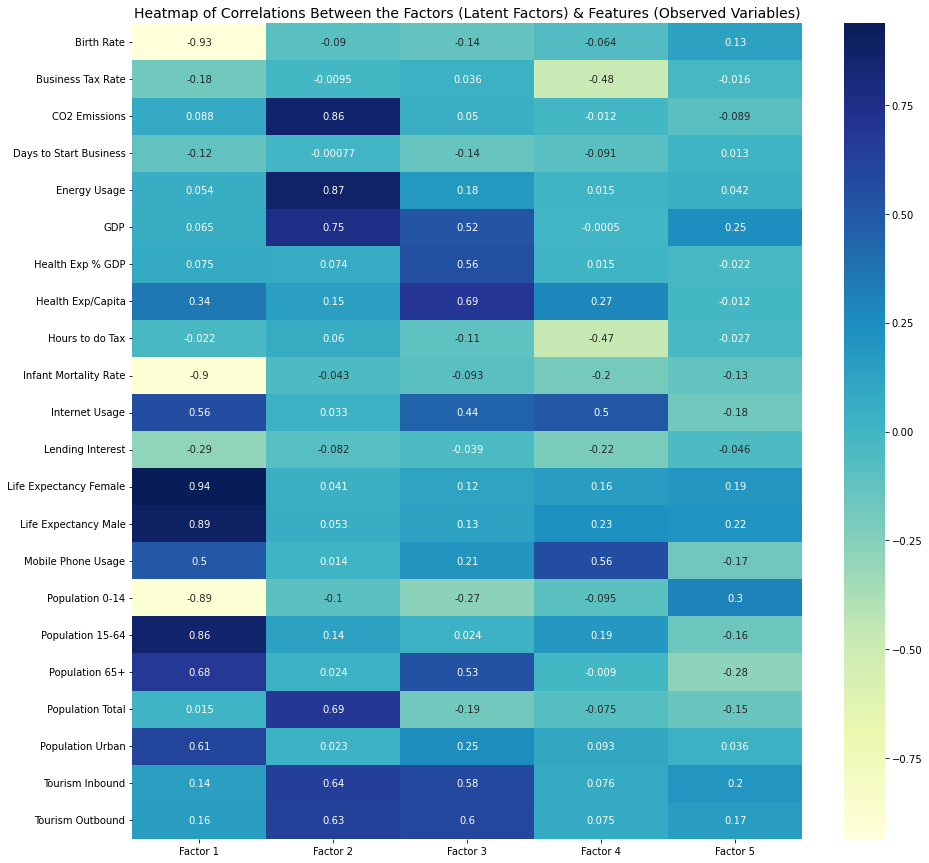

In [144]:
#Heatmap of loadings
plt.figure(figsize=(15,15))
sns.heatmap(loads, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Correlations Between the Factors (Latent Factors) & Features (Observed Variables)', fontsize=14)
plt.show()

#### Key Insights from Correlation Heatmap of Factors and Features:
- Factor 1: Life Expectancy Female, birth rate, infant mortality rate, life expectancy male and population from 0-14, 15-64 are highly influencing
- Factor 2: CO2 Emissions, Energy Usage GDP are highly influencing
- Factor 3: Health expenditure % on GDP, Tourism outbound & inbound are highly impacting
- Factor 4: Mobile Phone usage & Internet usage are the influencing factors for the development

In [145]:
# Get variance of each factors
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
print(fa_var)

                       0         1         2         3         4
SS loadings     6.610733  3.416102  2.575808  1.333207  0.544125
Proportion Var  0.300488  0.155277  0.117082  0.060600  0.024733
Cumulative Var  0.300488  0.455765  0.572847  0.633448  0.658181


### Dendogram with Single method for Factors Transformation data

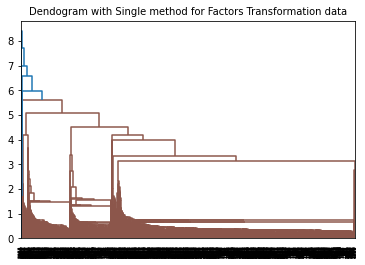

In [147]:
# Transforming the Factor Analysis data
factor_scores = fa.transform(df1_normal)

## Dendrogram representation for PCA data
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Dendogram with Single method for Factors Transformation data
dendrogram=sch.dendrogram(sch.linkage(factor_scores,method='single'))
plt.title('Dendogram with Single method for Factors Transformation data', fontsize=10)
plt.show()

### Creating a Dendogram with Complete method for Factors Transformation data

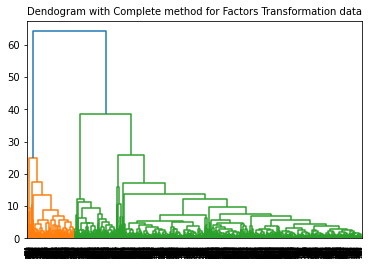

In [148]:
# Dendogram with Complete method for Factors Transformation data
dendrogram=sch.dendrogram(sch.linkage(factor_scores,method='complete'))
plt.title('Dendogram with Complete method for Factors Transformation data', fontsize=10)
plt.show()

From the above Dendogram we have the result that the hierarchical relationships between the objects with complete method are litte better than single method for factor scores data

In [149]:
df1_normal['Country']=df['Country']
df1_normal.head(2)

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,-0.233821,0.522025,-0.118176,-0.228729,-0.226087,-0.200426,-1.152594,-0.523635,0.444292,0.084171,...,0.044777,-1.245934,0.416610,-0.098764,-0.748497,0.002109,0.148884,-0.362455,-0.356762,Algeria
1,2.468879,0.522025,-0.260721,-0.228729,-0.303405,-0.239231,-1.191335,-0.550117,0.444292,3.354954,...,-2.464020,-1.245934,1.684995,-1.862691,-1.029492,-0.141061,-0.972226,-0.367342,-0.360447,Angola


In [150]:
# Label Encoder for Country Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1_normal['Country']=le.fit_transform(df1_normal['Country'])
df1_normal.head(2)

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,-0.233821,0.522025,-0.118176,-0.228729,-0.226087,-0.200426,-1.152594,-0.523635,0.444292,0.084171,...,0.044777,-1.245934,0.416610,-0.098764,-0.748497,0.002109,0.148884,-0.362455,-0.356762,2
1,2.468879,0.522025,-0.260721,-0.228729,-0.303405,-0.239231,-1.191335,-0.550117,0.444292,3.354954,...,-2.464020,-1.245934,1.684995,-1.862691,-1.029492,-0.141061,-0.972226,-0.367342,-0.360447,5


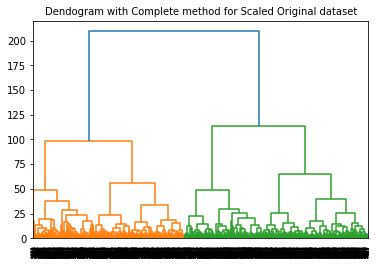

In [152]:
# Dendogram with Complete method for Scaled Original dataset
dendrogram=sch.dendrogram(sch.linkage(df1_normal,method='complete'))
plt.title('Dendogram with Complete method for Scaled Original dataset', fontsize=10)
plt.show()

## Hierarchical Clustering for Scaled Data with Single method

In [153]:
from sklearn.cluster import AgglomerativeClustering
hierarchy_norm=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='single')
hierarchy_norm.fit(scaled_data)

AgglomerativeClustering(affinity='Euclidean', linkage='single', n_clusters=4)

In [154]:
hierarchy_norm_labels=hierarchy_norm.labels_
hierarchy_norm_labels
print('The Total clusters for Scaled data using Hierarchical Clustering are: ', np.unique(hierarchy_norm_labels))

The Total clusters for Scaled data using Hierarchical Clustering are:  [0 1 2 3]


In [155]:
# Silhouette Score for Hierarchical Clustering of Scaled data
from sklearn.metrics import silhouette_score
sil_score_hierarchy_scaled=silhouette_score(scaled_data,hierarchy_norm_labels)
sil_score_hierarchy_scaled

0.21075703942520943

In [156]:
clr=pd.DataFrame()
clr['Country']=df['Country']
clr['Hierarchy_Scaled_Data']=hierarchy_norm_labels

In [157]:
# Cluster 0
cluster_H0=clr[(clr['Hierarchy_Scaled_Data'] == 0)]

# Cluster 1
cluster_H1=clr[(clr['Hierarchy_Scaled_Data'] == 1)]

# Cluster 2
cluster_H2=clr[(clr['Hierarchy_Scaled_Data'] == 2)]

# Cluster 3
cluster_H3=clr[(clr['Hierarchy_Scaled_Data'] == 3)]


In [158]:
clr

,Country,Hierarchy_Scaled_Data
0,Algeria,0
1,Angola,0
2,Benin,0
3,Botswana,0
4,Burkina Faso,0
...,...,...
2699,Turks and Caicos Islands,0
2700,United States,0
2701,Uruguay,0
2702,"Venezuela, RB",0


In [159]:
cluster_H0['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan',
       'Brunei Darussalam', 'Cambodia', 'China', 'Georgia',
       'Hong Kong SAR, China', 'India', 'Indonesia', 'Japan',
       'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 

In [160]:
cluster_H1['Country'].unique()

array(['Suriname'], dtype=object)

In [161]:
cluster_H2['Country'].unique()

array(['China'], dtype=object)

In [162]:
cluster_H3['Country'].unique()

array(['China'], dtype=object)

## Building KMeans Clustering Model for Scaled Data

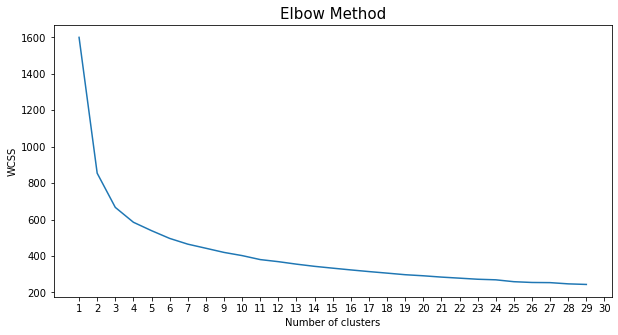

In [174]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))   
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method', fontsize=15)
plt.xticks(range(1, 31))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Key Insights from the Above Plot:
- We can observe that the most of the variance is covered with 4 clusters
- There is not much variance in the plot after 4rth cluster, the line almost flattened through the all remaining clusters

In [179]:
# Lets build the KMeans model with 4 clusters
kmeans_norm = KMeans(n_clusters=4,random_state=0)
kmeans_norm.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [180]:
clusters_norm=kmeans_norm.labels_
np.unique(clusters_norm)

array([0, 1, 2, 3])

In [181]:
# Silhouette Score for Kmeans Clustering model and scaled data 
sil_kmeans_norm=silhouette_score(scaled_data,clusters_norm)
sil_kmeans_norm

0.24329745110062828

In [182]:
clr['kmeans_scaled_data']=clusters_norm

In [183]:
clr['kmeans_scaled_data'].value_counts()

0    844
3    742
2    637
1    481
Name: kmeans_scaled_data, dtype: int64

In [184]:
# Cluster 0
cluster_kmeans_0=clr[(clr['kmeans_scaled_data'] == 0)]
cluster_kmeans_0=cluster_kmeans_0['Country'].unique()

# Cluster 1
cluster_kmeans_1=clr[(clr['kmeans_scaled_data'] == 1)]
cluster_kmeans_1=cluster_kmeans_1['Country'].unique()

# Cluster 2
cluster_kmeans_2=clr[(clr['kmeans_scaled_data'] == 2)]
cluster_kmeans_2=cluster_kmeans_2['Country'].unique()

# Cluster 3
cluster_kmeans_3=clr[(clr['kmeans_scaled_data'] == 3)]
cluster_kmeans_3=cluster_kmeans_3['Country'].unique()


In [185]:
print('Cluster 0 Length',len(cluster_kmeans_0))
print('Cluster 1 Length',len(cluster_kmeans_1))
print('Cluster 2 Length',len(cluster_kmeans_2))
print('Cluster 3 Length',len(cluster_kmeans_3))


Cluster 0 Length 112
Cluster 1 Length 66
Cluster 2 Length 58
Cluster 3 Length 89


In [186]:
print('Cluster 0:','\n', cluster_kmeans_0, '\n')
print('Cluster 1:','\n', cluster_kmeans_1,'\n')
print('Cluster 2:','\n', cluster_kmeans_2,'\n')
print('Cluster 3:','\n', cluster_kmeans_3,'\n')

Cluster 0: 
 ['Armenia' 'Georgia' 'Hong Kong SAR, China' 'Korea, Rep.'
 'Macao SAR, China' 'Singapore' 'Andorra' 'Austria' 'Belarus'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Estonia' 'Faeroe Islands' 'Finland' 'France' 'Greece' 'Hungary'
 'Ireland' 'Isle of Man' 'Italy' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Macedonia, FYR' 'Malta' 'Monaco' 'Montenegro'
 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'Serbia'
 'Slovak Republic' 'Slovenia' 'Spain' 'Ukraine' 'Bahrain' 'Israel'
 'Kuwait' 'Lebanon' 'Qatar' 'United Arab Emirates' 'Guam' 'New Zealand'
 'Argentina' 'Aruba' 'Bahamas, The' 'Barbados' 'Bermuda' 'Cayman Islands'
 'Chile' 'Cuba' 'Curacao' 'Puerto Rico' 'Sint Maarten (Dutch part)'
 'Turks and Caicos Islands' 'Uruguay' 'Virgin Islands (U.S.)'
 'New Caledonia' 'Seychelles' 'Brunei Darussalam' 'Moldova' 'Australia'
 'Brazil' 'Costa Rica' 'Dominica' 'Greenland' 'Tunisia' 'China'
 'Korea, Dem. Rep.' 'Malaysia' 'Thailand' 'Mauri

In [187]:
# Creating Models With PCA Data
PCA_data

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.297875,-0.322774,1.276312,0.245787,-0.675056,-0.661699
1,-6.488325,1.802918,-1.131279,1.437881,1.460693,4.104450
2,-4.745324,1.052911,-0.580345,0.867532,0.460770,1.786984
3,-3.136657,0.421438,0.026670,0.282575,-0.361834,-0.274033
4,-5.049017,1.310954,-0.884181,-0.096699,-0.570433,-0.384301
...,...,...,...,...,...,...
2699,7.281317,11.194127,-3.198735,0.271998,1.350131,-2.412304
2700,12.723473,17.794407,-6.223885,0.802248,1.728104,-2.987175
2701,3.840428,2.037188,0.584650,-0.777852,0.373843,0.828660
2702,1.993788,2.631293,2.947251,0.081841,2.829611,-0.635597


# Kmeans for PCA Data

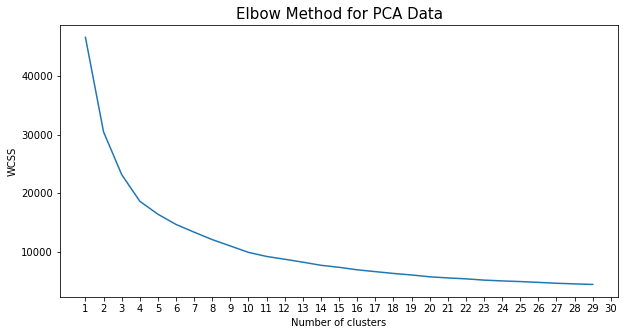

In [196]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(PCA_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))   
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method for PCA Data', fontsize=15)
plt.xticks(range(1, 31))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [199]:
# Lets build the KMeans model with 3 clusters
kmeans_pca = KMeans(n_clusters=3,random_state=0)
kmeans_pca.fit(PCA_data)

KMeans(n_clusters=3, random_state=0)

In [200]:
kmeans_pca_labels=kmeans_pca.labels_

In [201]:
# Silhouette Score for Kmeans Clustering model and PCA data 
sil_pca=silhouette_score(PCA_data,kmeans_pca_labels)
sil_pca

0.39884622875710835

In [202]:
clr['pca_labels']=kmeans_pca_labels

In [203]:
clr.head()

,Country,Hierarchy_Scaled_Data,Hierarchy_complete,Hierarchy_avg,kmeans_scaled_data,Hierarchy_pca,Hierarchy_pcac,Hierarchy_pcaa,pca_labels
0,Algeria,0,0,2,3,0,0,0,2
1,Angola,0,1,1,2,0,0,0,2
2,Benin,0,1,1,2,0,0,0,2
3,Botswana,0,1,1,2,0,0,0,2
4,Burkina Faso,0,1,1,2,0,0,0,2


In [204]:
clr['pca_labels'].value_counts()

0    1570
2    1106
1      28
Name: pca_labels, dtype: int64

In [205]:
# Cluster 4
# kmeans_4=clr[(clr['pca_labels'] == 4)]
# cluster_4=kmeans_4['Country'].unique()

# Cluster 3
kmeans_3=clr[(clr['pca_labels'] == 3)]
cluster_3=kmeans_3['Country'].unique()

# Cluster2
kmeans_2=clr[(clr['pca_labels'] == 2)]
cluster_2=kmeans_2['Country'].unique()

# Cluster 1
kmeans_1=clr[(clr['pca_labels'] == 1)]
cluster_1=kmeans_1['Country'].unique()

# Cluster 0
kmeans_0=clr[(clr['pca_labels'] == 0)]
cluster_0=kmeans_0['Country'].unique()

In [206]:
print('Cluster 0:','\n', cluster_0, '\n')
print('Cluster 1:','\n', cluster_1,'\n')
print('Cluster 2:','\n', cluster_2,'\n')

Cluster 0: 
 ['Mauritius' 'Seychelles' 'Tunisia' 'Armenia' 'Brunei Darussalam'
 'Georgia' 'Hong Kong SAR, China' 'Japan' 'Korea, Dem. Rep.' 'Korea, Rep.'
 'Macao SAR, China' 'Malaysia' 'Singapore' 'Thailand' 'Andorra' 'Austria'
 'Belarus' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Faeroe Islands' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Isle of Man'
 'Italy' 'Kosovo' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Macedonia, FYR' 'Malta' 'Moldova' 'Monaco' 'Montenegro' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'San Marino'
 'Serbia' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Ukraine' 'United Kingdom' 'Bahrain' 'Israel' 'Kuwait' 'Lebanon' 'Qatar'
 'United Arab Emirates' 'American Samoa' 'Australia' 'French Polynesia'
 'Guam' 'New Caledonia' 'New Zealand' 'Antigua and Barbuda' 'Argentina'
 'Aruba' 'Bahamas, The' 'Barbados' 'Bermuda' 'Brazil' 'C

In [248]:
import pickle
model = {'scaler': scaler, 'pca': pca, 'kmean': kmeans_pca}
with open('trained_model_clustering.pkl', 'wb') as f:
    pickle.dump(model, f)

# DBSCAN Clustering 

In [234]:
# DBSCAN model for Scaled data
from sklearn.cluster import DBSCAN

In [235]:
dbscan=DBSCAN(eps=0.5, min_samples=6)

In [236]:
dbscan.fit(PCA_data)

DBSCAN(min_samples=6)

In [237]:
dbscan_labels=dbscan.labels_

In [238]:
# Silhouette Score 
sil_dbscan_norm=silhouette_score(PCA_data,dbscan_labels)
sil_dbscan_norm

-0.3984247123747174

In [239]:
# DBSCAN model for PCA data
dbscan_pca=DBSCAN(eps=0.5,min_samples=4)

In [240]:
dbscan_pca.fit(PCA_data)
dbscan_pca_labels=dbscan_pca.labels_

In [241]:
# Silhouette Score
sil_dbscan_pca=silhouette_score(PCA_data,dbscan_pca_labels)
sil_dbscan_pca

-0.36154735769652335

In [242]:
clr['dbscan_pca']=dbscan_pca_labels

In [243]:

# Cluster 4
dbscan_4=clr[(clr['dbscan_pca'] == 4)]
cluster_4=dbscan_4['Country'].unique()

# Cluster 3
dbscan_3=clr[(clr['dbscan_pca'] == 3)]
cluster_3=dbscan_3['Country'].unique()

# Cluster2
dbscan_2=clr[(clr['dbscan_pca'] == 2)]
cluster_2=dbscan_2['Country'].unique()

# Cluster 1
dbscan_1=clr[(clr['dbscan_pca'] == 1)]
cluster_1=dbscan_1['Country'].unique()

# Cluster 0
dbscan_0=clr[(clr['dbscan_pca'] == 0)]
cluster_0=dbscan_0['Country'].unique()
print(len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3)+len(cluster_4))

167


In [244]:
print('Cluster 0:','\n', cluster_0,'\n')
print('Cluster 1:','\n', cluster_1,'\n')
print('Cluster 2:','\n', cluster_2,'\n')
print('Cluster 3:','\n', cluster_3,'\n')
print('Cluster 4:','\n', cluster_4,'\n')

Cluster 0: 
 ['Algeria' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Morocco' 'Mozambique' 'Namibia' 'Niger'
 'Rwanda' 'Senegal' 'Seychelles' 'Sudan' 'Swaziland' 'Tanzania' 'Togo'
 'Tunisia' 'Uganda' 'Zambia' 'Armenia' 'Azerbaijan' 'Bhutan'
 'Brunei Darussalam' 'Cambodia' 'Georgia' 'Hong Kong SAR, China'
 'Kazakhstan' 'Korea, Dem. Rep.' 'Lao PDR' 'Malaysia' 'Maldives' 'Nepal'
 'Philippines' 'Sri Lanka' 'Tajikistan' 'Turkmenistan' 'Uzbekistan'
 'Vietnam' 'Albania' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Faeroe Islands' 'Finland' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Latvia' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Macedonia, FYR' 'Malta' 'Moldo

### Conclusion:   We have selected KMeans Clustering with PCA data as the best model for the given data set.

In [ ]:
# installing streamlit library
! pip install streamlit